In [91]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [92]:


users = pd.read_csv('takehome_users.csv', encoding='iso-8859-1')
users['creation_time'] = pd.to_datetime(users['creation_time'])
# users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'])
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')


users = users.dropna(axis=0)
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11980,11981,2013-03-05 01:53:48,Fry Tyler,TylerFry@gmail.com,GUEST_INVITE,2013-04-02 01:53:48,0,0,110,5775.0
11981,11982,2013-12-06 14:39:15,Barajas Maria,MariaCBarajas@gmail.com,ORG_INVITE,2013-12-06 14:39:15,1,1,57,2527.0
11989,11990,2013-07-05 21:00:48,Juhl Aase,AasePJuhl@jourrapide.com,ORG_INVITE,2013-07-06 21:00:48,0,0,25,3944.0
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0


In [93]:
engagement = pd.read_csv('takehome_user_engagement.csv', encoding='iso-8859-1')
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])
engagement

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [94]:
week = dt.timedelta(days=7)
counter=0

engagement_grouped = engagement.copy().groupby('user_id').sum()

In [95]:
mult_visits = engagement_grouped[engagement_grouped['visited']>=3]
mult_visits.index.values

array([    2,    10,    20, ..., 11981, 11988, 11991])

In [96]:
active_users = []
for id in mult_visits.index.values:
    mult_engagement = engagement[engagement['user_id'] == id].resample('D', on='time_stamp').sum()
    mult_engagement = mult_engagement.reset_index()
    mult_engagement = mult_engagement[mult_engagement['visited']>0]
    
    for i in range(mult_engagement.shape[0]-2):

        if mult_engagement.iloc[i]['time_stamp'] + week >= mult_engagement.iloc[i+1]['time_stamp'] and mult_engagement.iloc[i]['time_stamp'] + week >= mult_engagement.iloc[i+2]['time_stamp']:
            active_users.append(id)
        
active_users

[2,
 2,
 2,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10

In [97]:
active_set = set(active_users)
users['active'] = users['object_id']
users['active'] = users['active'].apply(lambda x: 1 if (x in active_set) else 0)

In [107]:
X = users.drop(['creation_time', 'name', 'email', 'last_session_creation_time', 'active'], axis=1)
y = users['active']


In [108]:
from sklearn.preprocessing import OneHotEncoder

ohc = OneHotEncoder(sparse=False)

categoricals = ohc.fit_transform(X[['creation_source', 'org_id']])

In [109]:
cat_columns = np.append(ohc.categories_[0], ohc.categories_[1])

In [110]:
categoricals = pd.DataFrame(categoricals, columns = cat_columns)


In [111]:
categoricals['object_id'] = users['object_id']
X = pd.merge(X.drop(['creation_source', 'org_id'], axis=1), 
             categoricals, 
             how='left', 
             left_on='object_id', 
             right_on='object_id')

X = X.drop('object_id', axis=1)

In [112]:
X = X.fillna(0)
X

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,GUEST_INVITE,ORG_INVITE,0,1,2,3,4,...,406,407,408,409,410,411,412,413,414,415
0,1,0,10803.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,316.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,1525.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,5151.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,5240.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4771,0,0,5775.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4772,1,1,2527.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4773,0,0,3944.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4774,0,0,8263.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(Cs=[0.1, 1, 10])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7918410041841004

In [114]:
np.squeeze(clf.coef_).shape

(420,)

In [125]:
importance = pd.DataFrame({'feature': X.columns.values, 'importance':np.squeeze(clf.coef_)})
importance['importance'] = np.abs(importance['importance'])
importance = importance.sort_values('importance', ascending=False)

Text(0.5, 1.0, 'feature coefficients')

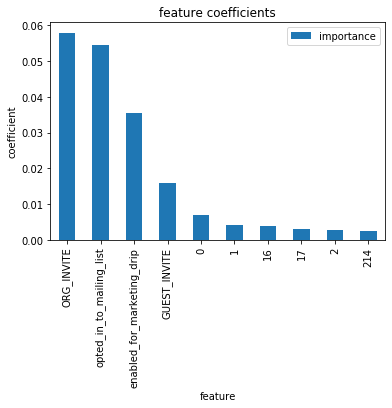

In [130]:
importance.head(10).plot(x='feature', y='importance', kind='bar')
plt.xlabel('feature')
plt.ylabel('coefficient')
plt.title('feature coefficients')